In [1]:
import os
import uproot as ur
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paths = []

for (path, dirnames, filenames) in os.walk('/home/dmisra/eic/segmentation_testing/'):
    paths.extend(os.path.join(path, name) for name in filenames)

In [3]:
samples = {}

for path in paths:
    with ur.open(path) as file:
       tree = file["events"]
       samples[os.path.basename(f'{path}')] = tree.arrays()

In [4]:
#Get layerID from cellID
def bitExtract(n, k, p):  
    return (((1 << k) - 1)  &  (n >> (p-1)))

In [5]:
def layer_edep(data, branch, count):
    edep = pd.DataFrame()

    for i in range(count):
        index = str(i)
        energies = np.array(data[f"{branch}.energy"][i])
        cellID = np.array(data[f"{branch}.cellID"][i])
        layerID = bitExtract(cellID, 6, 9)
        df = pd.DataFrame({f'{index}': energies, 'layerID': layerID})
        layers = df.groupby("layerID").sum()

        if len(layers) != 0:
            edep = pd.concat([edep,layers], axis=1).replace(np.NaN,0)
            
    return edep

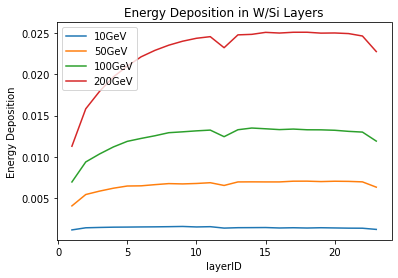

In [6]:
layer_edep(samples["zdc_neutron_10GeV_10e4.edm4hep.root"],"ZDC_WSi_Hits",10000).mean(axis=1).plot()
layer_edep(samples["zdc_neutron_50GeV_10e4.edm4hep.root"],"ZDC_WSi_Hits",10000).mean(axis=1).plot()
layer_edep(samples["zdc_neutron_100GeV_10e4.edm4hep.root"],"ZDC_WSi_Hits",10000).mean(axis=1).plot()
layer_edep(samples["zdc_neutron_200GeV_10e4.edm4hep.root"],"ZDC_WSi_Hits",10000).mean(axis=1).plot()
plt.ylabel("Energy Deposition")
plt.title("Energy Deposition in W/Si Layers")
plt.legend(["10GeV", "50GeV", "100GeV", "200GeV"])
plt.savefig("wsiedep_layers.pdf")

In [6]:
layer_edep(samples["out_neutron.edm4hep.root"],"ZDC_WSi_Hits",5000).mean(axis=1).plot()
plt.ylabel("Energy Deposition")
plt.title("Energy Deposition in W/Si Layers")